# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
# %pip install --upgrade plotly

### Import Statements

In [251]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

### Notebook Presentation

In [142]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [143]:
df_yearly = pd.read_csv('/content/drive/MyDrive/100DaysOfCodeInPython/Day 79 The Tragic Discovery of Handwashing t-Tests & Distributions/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('/content/drive/MyDrive/100DaysOfCodeInPython/Day 79 The Tragic Discovery of Handwashing t-Tests & Distributions/monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [144]:
print(f'The shapes of df_yearly and df_monthly are:')
print(f'- df_yearly: {df_yearly.shape} => {df_yearly.shape[0]} rows and {df_yearly.shape[1]} columns')
print(f'- df_monthly: {df_monthly.shape} => {df_monthly.shape[0]} rows and {df_monthly.shape[1]} columns')

The shapes of df_yearly and df_monthly are:
- df_yearly: (12, 4) => 12 rows and 4 columns
- df_monthly: (98, 3) => 98 rows and 3 columns


In [145]:
print(f'The column names are:')
print(f'- df_yearly: {df_yearly.columns}')
print(f'- df_monthly: {df_monthly.columns}')

The column names are:
- df_yearly: Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
- df_monthly: Index(['date', 'births', 'deaths'], dtype='object')


In [146]:
print(f'Years included in the dataset:')
print(f'df_yearly => from {df_yearly.year.min()} to {df_yearly.year.max()}, that\'s {len(df_yearly.year.value_counts())} years')
print(f'df_monthly => from {df_monthly.date.dt.year.min()} to {df_monthly.date.dt.year.max()}, that\'s {len(df_monthly.date.dt.year.value_counts())} years')

Years included in the dataset:
df_yearly => from 1841 to 1846, that's 6 years
df_monthly => from 1841 to 1849, that's 9 years


In [147]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [148]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [149]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [150]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


### Check for Nan Values and Duplicates

In [151]:
print('Are there any NaN values or duplicates in df_yearly?')
print(f'Duplicate values?: {df_yearly.duplicated().values.any()}')
print(f'NaN values?: {df_yearly.isna().values.any()}')

Are there any NaN values or duplicates in df_yearly?
Duplicate values?: False
NaN values?: False


In [152]:
print('Are there any NaN values or duplicates in df_monthly?')
print(f'Any duplicates: {df_monthly.duplicated().values.any()}')
print(f'Any NaN: {df_monthly.isna().values.any()}')

Are there any NaN values or duplicates in df_monthly?
Any duplicates: False
Any NaN: False


### Descriptive Statistics

In [153]:
print(f'What were the average number of births / deaths that took place per month?')
df_monthly.describe()[df_monthly.describe().index == 'mean']

What were the average number of births / deaths that took place per month?


,births,deaths
mean,267.00,22.47


In [154]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [155]:
print(f'The percentage of women giving birth who died throughout the 1840s was:')
print(f'Clinic 1: {round(df_yearly[df_yearly.clinic == "clinic 1"].deaths.sum() / df_yearly[df_yearly.clinic == "clinic 1"].births.sum(),4)*100}%')
print(f'Clinic 2: {round(df_yearly[df_yearly.clinic == "clinic 2"].deaths.sum() / df_yearly[df_yearly.clinic == "clinic 2"].births.sum(),4)*100}%')
print(f'Total: {round(df_yearly.deaths.sum() / df_yearly.births.sum(),4)*100}%')

The percentage of women giving birth who died throughout the 1840s was:
Clinic 1: 9.92%
Clinic 2: 3.88%
Total: 7.08%


In [156]:
# Solution:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


Childbirth was very risky! About 7.08% of women died 💀 in the 1840s (compared to 0.018% in the US in 2013).

If someone gave me a bag of 100 M&Ms and told me that 7 of them would kill me, I'd (probably) pass on those M&Ms 🤭. Just saying.

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

In [157]:
# Create locators for years and months and use mdates.DateFormatter for Years
months = mdates.MonthLocator()
years = mdates.YearLocator()
years_format = mdates.DateFormatter('%Y')

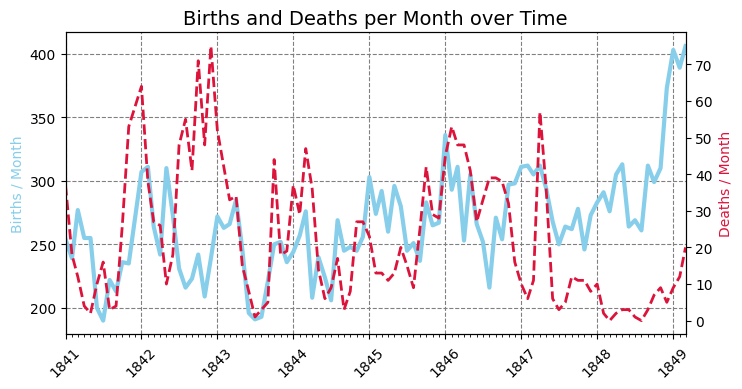

In [158]:
plt.figure(figsize=(8,4), dpi=100)
plt.title('Births and Deaths per Month over Time', fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_ylabel('Births / Month', color='skyblue')
ax2.set_ylabel('Deaths / Month', color='crimson')

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linestyle='-',
         lw=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linestyle='--',
         lw=2)

plt.show()

What we see is that something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births! 🤔

# The Yearly Data Split by Clinic

There are two maternity wards at the Vienna General Hospital: clinic 1 and clinic 2. Clinic 1 was staffed by all-male doctors and medical students, and clinic 2 was staffed by female midwives.

Now let's look at the annual data instead. 

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [159]:
fig = px.line(df_yearly,
              x='year',
              y='births',
              color='clinic',
              width=800,
              height=400)
fig.show()

In [160]:
fig = px.line(df_yearly,
              x='year',
              y='deaths',
              color='clinic',
              width=800,
              height=400)
fig.show()

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

**Solution to Challenge 2**

We can add a new column that has the percentage of deaths for each row like this:

In [161]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births


The average death rate for the entire time period for clinic 1 is:

In [162]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.



The average death rate for the entire time period for clinic 2 is:

In [163]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.



9.92% for clinic 1, in comparison, clinic 2 which was staffed by midwives had a much lower death rate of 3.88% over the course of the entire period. Hmm... 🤔

In [164]:
# My way
df_yearly['pct_deaths'] = df_yearly['deaths'] / df_yearly['births']
df_yearly.head(3)

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09


### Plotting the Proportion of Yearly Deaths by Clinic

In [165]:
fig = px.line(df_yearly,
              x='year',
              y='pct_deaths',
              color='clinic',
              width=800,
              height=500,
              title="Percentage of Deaths per Clinic over Time")
# fig.update_layout(showlegend=False)
fig.show()

### **The story continues...**

At first, Dr Semmelweis thought that the position of the women giving birth was the issue. In clinic 2, the midwives' clinic, women gave birth on their sides. In the doctors' clinic, women gave birth on their backs. So, Dr. Semmelweis, had women in the doctors' clinic give birth on their sides. However, this had no effect on the death rate.

Next, Dr Semmelweis noticed that whenever someone on the ward died, a priest would walk through clinic 1, past the women's beds ringing a bell 🔔. Perhaps the priest and the bell ringing terrified the women so much after birth that they developed a fever, got sick and died. Dr Semmelweis had the priest change his route and stop ringing the bell 🔕. Again, this had no effect.

At this point, Dr Semmelweis was so frustrated he went on holiday to Venice. Perhaps a short break would clear his head. When Semmelweis returned from his vacation, he was told that one of his colleagues, a pathologist, had fallen ill and died. His friend had pricked his finger while doing an autopsy on a woman who had died from childbed fever and subsequently got very sick himself and died. 😮

Looking at the pathologist's symptoms, Semmelweis realised the pathologist died from the same thing as the women he had autopsied.  This was his breakthrough: anyone could get sick from childbed fever, not just women giving birth!

This is what led to Semmelweis' new theory. Perhaps there were little pieces or particles of a corpse that the doctors and medical students were getting on their hands while dissecting the cadavers during an autopsy. And when the doctors delivered the babies in clinic 1, these particles would get inside the women giving birth who would then develop the disease and die.

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).
In June 1846, Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments not just with soap and water but with a chlorine solution (he didn't know it at the time, but chlorine is an amazing disinfectant). The reason Dr Semmelweis actually chose the chlorine was that he wanted to get rid of any smell on doctors' hands after an autopsy. No one knew anything about bacteria, germs or viruses at the time.

In [166]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [167]:
# Solution:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births
# My way:
df_monthly['pct_deaths'] = df_monthly['deaths'] / df_monthly['births']

In [168]:
before_handwashing = df_monthly[df_monthly.date < handwashing_start]
after_handwashing = df_monthly[df_monthly.date >= handwashing_start]

The death rate per birth dropped dramatically after handwashing started - from close to 10.53% to 2.15%. We can use the colon and dot inside a print statement to determine the number of digits we'd like to print out from a number.

In [169]:
# Solution:
bw_rate = before_handwashing.deaths.sum() / before_handwashing.births.sum() * 100
aw_rate = after_handwashing.deaths.sum() / after_handwashing.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.53%
Average death rate AFTER 1847 was 2.15%


In [170]:
# My way:
print(f'The average death rate prior to June 1947 was: {"{:.2%}".format(before_handwashing.pct_deaths.mean())}')
print(f'The average death rate after June 1947 was: {"{:.2%}".format(after_handwashing.pct_deaths.mean())}')

The average death rate prior to June 1947 was: 10.50%
The average death rate after June 1947 was: 2.11%


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

**Solution**

To work out the moving 6-month average we first set the date column as the index. Then we can use the same Pandas functions as in the Google Trends notebook.

In [171]:
# Solution:
roll_df = before_handwashing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

In [172]:
# My way:
before_rolling = before_handwashing.rolling(window=6,on='date').mean()
after_rolling = after_handwashing.rolling(window=6,on='date').mean()

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=800>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

After copy-pasting the previous code for the Matplotlib chart, we just need to change a few things. First, we remove the twin axes. And instead, we plot the three different lines on the same axis. To create the legend, we supply a label to the `.plot()` function and capture return value in a variable. It's important to notice that `.plot()` returns more than one thing, so we need to use a comma (`,`) since we're only grabbing the first item. We can then feed these handles into `plt.legend()`.

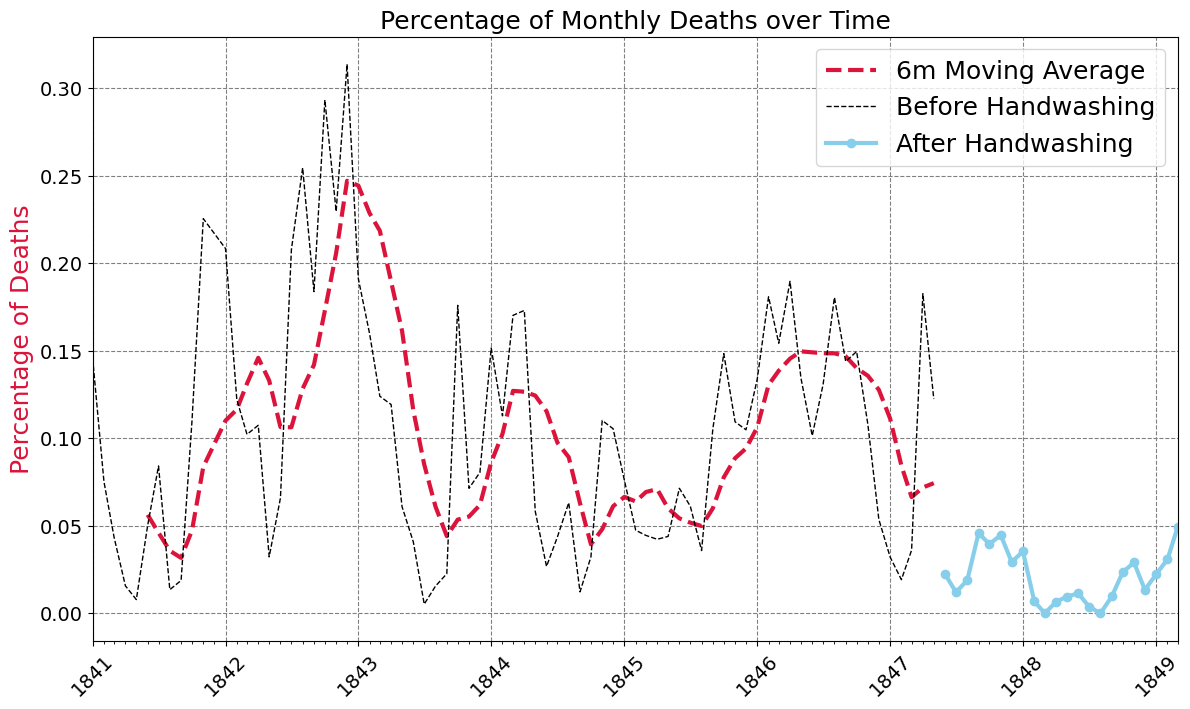

In [173]:
# Solution:
plt.figure(figsize=(14,8), dpi=100)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_format)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_handwashing.date, 
                    before_handwashing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_handwashing.date, 
                    after_handwashing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

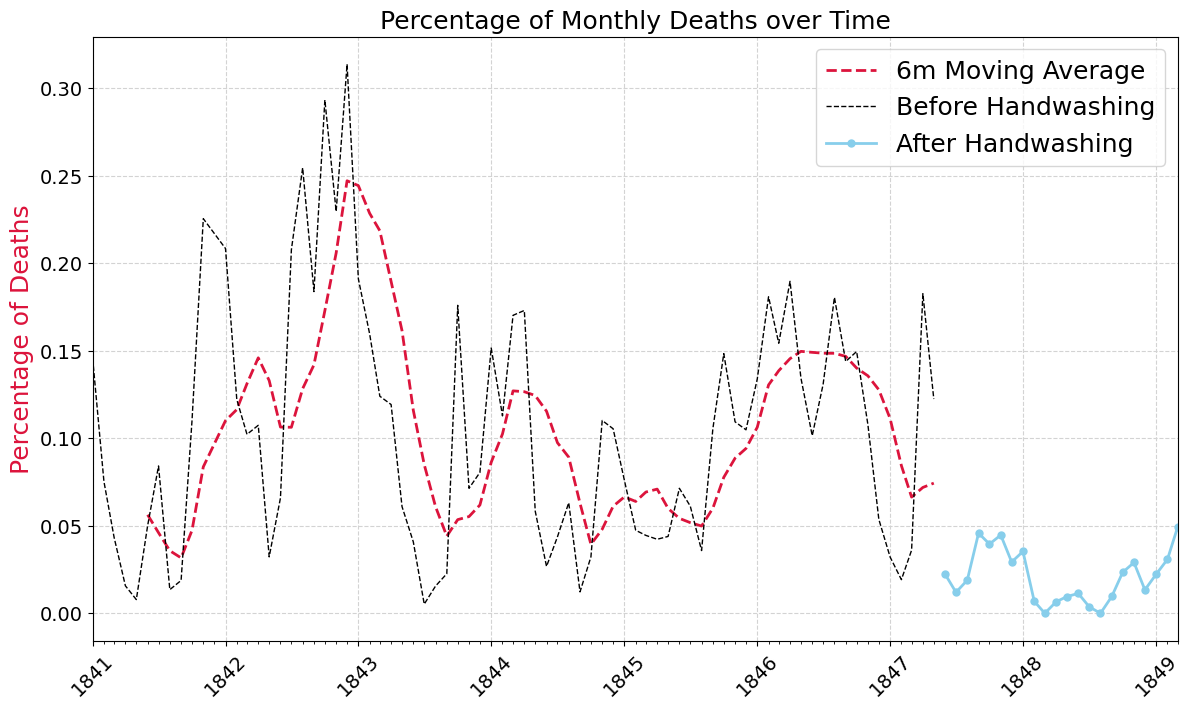

In [174]:
plt.figure(figsize=(14,8), dpi=100)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_format)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='lightgrey', linestyle='--')

ma_line, = plt.plot(before_rolling.date,
                    before_rolling.pct_deaths, 
                    color='crimson', 
                    linewidth=2, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_handwashing.date, 
                    before_handwashing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_handwashing.date, 
                    after_handwashing.pct_deaths, 
                    color='skyblue', 
                    linewidth=2, 
                    marker='o',
                    markersize=5,
                    label='After Handwashing')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [175]:
# My way:
# What was the average percentage of monthly deaths before handwashing?
print(f'{"{:.2%}".format(df_monthly.pct_deaths[df_monthly.date < handwashing_start].mean())}')
# What was the average percentage of monthly deaths after handwashing was made obligatory?
print(f'{"{:.2%}".format(df_monthly.pct_deaths[df_monthly.date >= handwashing_start].mean())}')
# By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
print(f'{"{:.2%}".format(df_monthly.pct_deaths[df_monthly.date < handwashing_start].mean() - df_monthly.pct_deaths[df_monthly.date >= handwashing_start].mean())}')
# How do these numbers compare to the average for all the 1840s that we calculated earlier?
print(f'Death rate for all the 1840s was {"{:.2%}".format(df_monthly.pct_deaths.mean())}')
# How many times lower are the chances of dying after handwashing compared to before?
print(f'{int(round(df_monthly.pct_deaths[df_monthly.date < handwashing_start].mean() / df_monthly.pct_deaths[df_monthly.date >= handwashing_start].mean(),0))} times lower')

10.50%
2.11%
8.40%
Death rate for all the 1840s was 8.62%
5 times lower


**Solution**

A lot of statistical tests rely on comparing features of distributions, like the mean. We see that the average death rate before handwashing was 10.5%. After handwashing was made obligatory, the average death rate was 2.11%. The difference is massive. Handwashing decreased the average death rate by 8.4%, a 5x improvement. 😮

In [176]:
# Solution:
avg_prob_before = before_handwashing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = after_handwashing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 2.11%.
Handwashing reduced the monthly proportion of deaths by 8.4%!
This is a 5.0x improvement!


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

The statistic above is impressive, but how do we show it graphically? With a box plot we can show how the quartiles, minimum, and maximum values changed in addition to the mean.

**Challenge**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [181]:
# My way
# Use NumPy's .where() function to add a column to df_monthly that shows if a particular date was before or after the start of handwashing.
df_monthly['before_or_after'] = np.where(df_monthly.date < handwashing_start, 'before', 'after')

In [190]:
# Use plotly to create box plot of the data before and after handwashing.
fig = px.box(df_monthly,
             x='before_or_after',
             y='pct_deaths',
             color='before_or_after',
             title='Death Rate Before and After Handwashing')

fig.update_layout(xaxis_title='Before or After Handwashing',
                  yaxis_title='Percentage of Monthly Deaths',)

fig.show()

The easiest way to create a box plot is to have a column in our DataFrame that shows the rows' "category" (i.e., was it before or after obligatory handwashing). NumPy allows us to easily test for a condition and add a column of data.

In [192]:
# Solution:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

Now we can use plotly:

In [193]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

**Interpretation**

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too. Let's take a look at a histogram to get a better sense of the distribution.

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

To create our histogram, we once again make use of the `color` parameter. This creates two separate histograms for us. When we set the opacity to 0.6 or so we can clearly see how the histograms overlap. The trick to getting a sensible-looking histogram when you have a very different number of observations is to set the `histnorm` to `'percent'`. That way the histogram with more observations won't completely overshadow the shorter series.

I quite like how in plotly we can display our box plot from earlier at the top.

In [222]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=20,
                   opacity=0.5,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',
                   width=900,)
# marginal (str) – One of 'rug', 'box', 'violin', or 'histogram'. If set, a subplot is drawn alongside the main plot, visualizing the distribution.
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

**Interpretation**

Now, we have only about 98 data points or so, so our histogram looks a bit jagged. It's not a smooth bell-shaped curve. However, we can estimate what the distribution would look like with a Kernel Density Estimate (KDE).

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


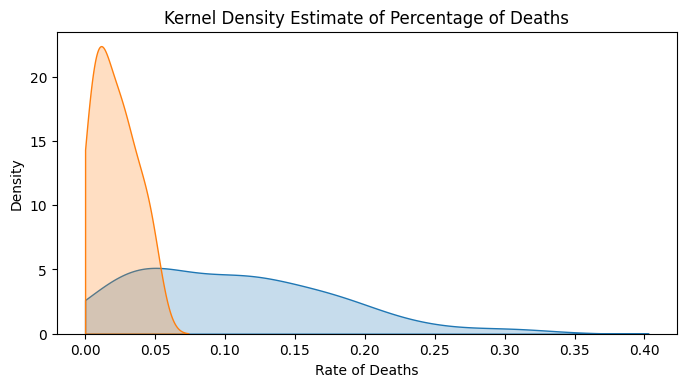

In [247]:
plt.figure(figsize=(8,4), dpi=100)
plt.title('Kernel Density Estimate of Percentage of Deaths')

before = sns.kdeplot(x=before_handwashing.pct_deaths, 
                     shade=True, 
                     clip=(0,1))
after = sns.kdeplot(x=after_handwashing.pct_deaths, 
                    shade=True, 
                    clip=(0,1))

before.set(xlabel='Rate of Deaths',
           ylabel='Density')

plt.show()

To create two bell-shaped curves of the estimated distributions of the death rates we just call `.kdeplot()` twice.

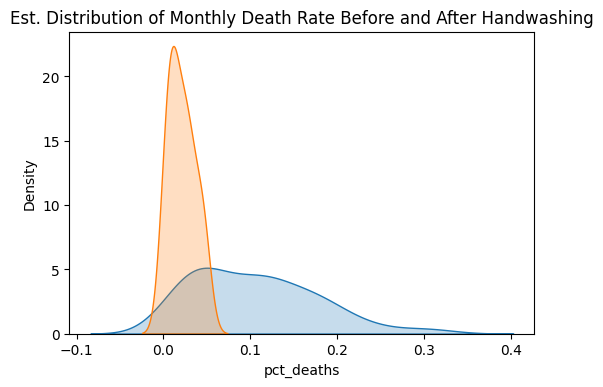

In [246]:
plt.figure(dpi=100)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_handwashing.pct_deaths, shade=True)
sns.kdeplot(after_handwashing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

However, the problem is that we end up with a negative monthly death rate on the left tail. The doctors would be very surprised indeed if a corpse came back to life after an autopsy! 🧟‍♀️

The solution is to specify a lower bound of 0 for the death rate.

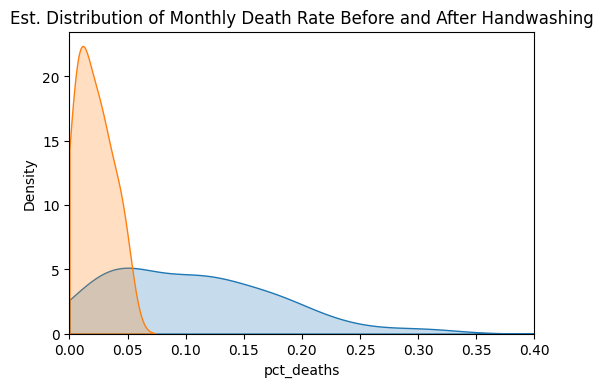

In [249]:
plt.figure(dpi=100)
sns.kdeplot(before_handwashing.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_handwashing.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is **statistically significant**.

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [272]:
# My way
result = stats.ttest_ind(before_handwashing.pct_deaths, after_handwashing.pct_deaths, equal_var=True)
print(f'The t-statistic is equal to: {result[0]:.2f}')
print(f'The p-value is equal to: {result[1]*100:.8f}%')

The t-statistic is equal to: 5.51
The p-value is equal to: 0.00002985%


In [274]:
# Solution:
t_stat, p_value = stats.ttest_ind(a=before_handwashing.pct_deaths, 
                                  b=after_handwashing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


When we calculate the p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. In other words, the difference in means is highly statistically significant and we can go ahead on publish our research paper 😊

# Learning Points & Summary

Well done, Doctor! With your thorough analysis and compelling visualisations of the handwashing data, you've convinced the hospital board to continue making hand washing obligatory!

**Today you've learned**

* How to use histograms to visualise distributions
* How to superimpose histograms on top of each other even when the data series have different lengths
* How to use a to smooth out kinks in a histogram and visualise a distribution with a Kernel Density Estimate (KDE)
* How to improve a KDE by specifying boundaries on the estimates
* How to use scipy and test for statistical significance by looking at p-values.
* How to highlight different parts of a time series chart in Matplotib.
* How to add and configure a Legend in Matplotlib.
* Use NumPy's `.where()` function to process elements depending on a condition.

# The Tragic Story of Dr Semmelweis

Gather round, gather round. Now I'll tell you how our story ends. Despite the incredible evidence in favour of Dr Semmelweis' theory - that childbed fever was caused by some "substance" (which today we know as bacteria) from autopsy room corpses - was rejected by the medical community at the time. But why?! 

Part of the reason is that Semmelweis was not very tactful. He made it look like doctors were giving childbed fever to women (which they in fact were). This is not something people wanted to hear.

However, he also published his data in the form of long tables without any data visualisations:

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-23_15-25-37-28877dab514343720243ddca867f7da4.png" width=700>

The long tables made it very hard to see what's actually going on! Also, at the time statistics and statistical arguments were quite uncommon in the field of medicine.

Eventually, Dr Semmelweis belligerent campaigning made him some powerful and influential enemies. He lost his job at the Vienna hospital, and doctors gave up washing their hands with chlorine. As Dr Semmelweis grew older he got even angrier and eventually quite "strange". This was either the immense frustration or possibly a result of another disease like Alzheimer's or syphilis. In 1965, at the age of 47, Dr Semmelweis was committed to a mental asylum. And at the asylum, he was probably beaten since he eventually died of sepsis, a complication of an infection in the bloodstream. The tragic irony is that sepsis is a similar kind of disease that he fought so hard to prevent in women who died from childbed fever. It wasn't until 20 years later with Louis Pasteur's work on germ theory that Dr Semmelweis' work gained acceptance. RIP Dr Semmelweis.

What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>